IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [2]:
global H_0, m_0, c
H_0 = 75 * 10**3 / (3.086*10**22) # s^-1
m_0 = -20.45
c = 3*10**8 # m/s

Investigate relationship between luminosity distance and redshift

_NOTE: We expect a  roughly linear relationship between distance and redshift, known as Hubble’s Law. However, if we extend the measurement to more distant objects, the relation becomes curved, and strongly dependent on the matter content of the Universe._

Text(0, 0.5, 'Redshift $z$')

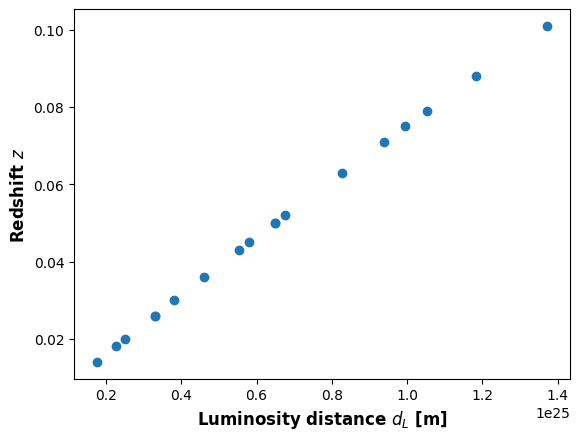

In [3]:
#reads data
name, redshift, eff_peak_mag, mag_err = functions.read_data('sn_data_milestone.txt')

#z < 0.1 data
low_redshift_indices = np.where(redshift<0.102)[0]
comoving_distance = functions.get_comoving_distance_low_z(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], H_0)
peak_flux, peak_flux_err = functions.get_flux(eff_peak_mag, mag_err, m_0)
d_L = functions.get_luminosity_distance(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], comoving_distance)
plt.scatter(d_L, redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1])
plt.xlabel('Luminosity distance $d_L$ [m]', weight = 'bold', fontsize = 12)
plt.ylabel('Redshift $z$', weight = 'bold', fontsize = 12)

Plotting effective magnitude against luminosity distance and fitting a curve to obtain the peak luminosity.

Text(0, 0.5, 'Effective magnitude $m_{eff}$')

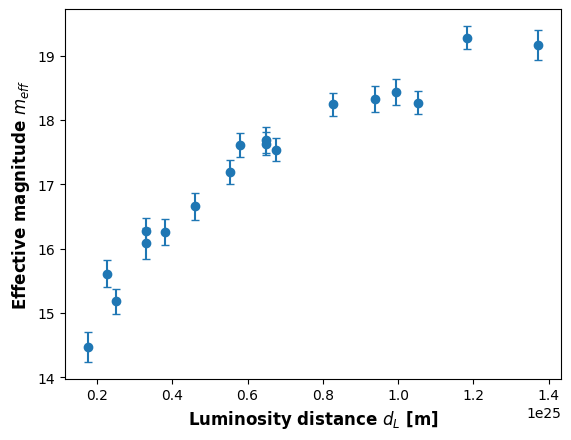

In [4]:
plt.errorbar(d_L, eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]+1], yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]+1], 
             ls='none', marker = 'o', capsize = 3)
plt.xlabel('Luminosity distance $d_L$ [m]', weight = 'bold', fontsize = 12)
plt.ylabel('Effective magnitude $m_{eff}$', weight = 'bold', fontsize = 12)

DoF = 17
Optimised parameters =  [3.26596058e+39] 

Covariance matrix = 
 [[1.95258522e+76]]


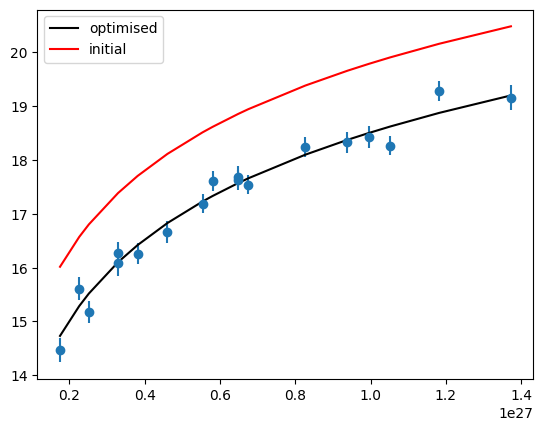

chi^2_min = 21.455532501736517
reduced chi^2 = 1.2620901471609716
$P(chi^2_min, DoF)$ = 0.2065742384451868


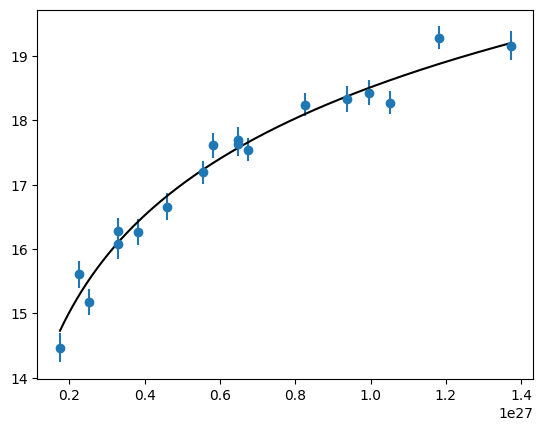

optimised parameter[0] = 3.265960579801944e+39 +/- 1.397349355509028e+38
3.265960579801944e+32
1.397349355509028e+31


In [5]:
#chi squared fitting

xval = d_L*100 # cm
yval = eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]+1]
yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]+1]

def model_funct(x, *vals):
    return -2.5*np.log10(vals[0]/(4*np.pi*x**2)) + m_0

initial = np.array([1.0*10**39]) # Initial guess for fit parameters

parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial) #optimised parameters given in erg/s/Ang
L_peak = parameters[0][0]*10**-7 #W/Ang
L_peak_err = parameters[1][0]*10**-7 #W/Ang

print(L_peak)
print(L_peak_err)

Calculate Ω_Λ,0

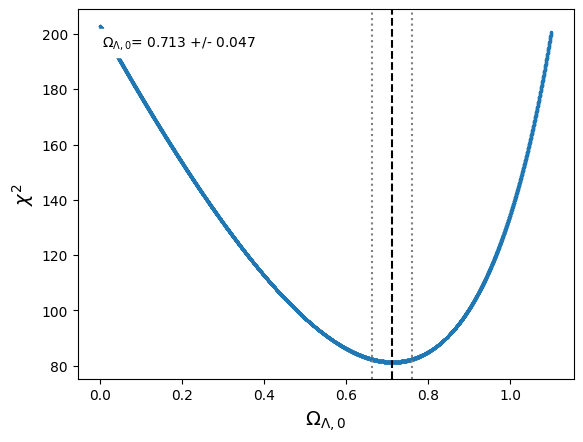

In [6]:
high_redshift_indices = np.where(redshift > 0.102)[0]

omega_lambda, omega_lambda_err = functions.find_omega_lambda_and_error(redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1], eff_peak_mag[high_redshift_indices[0]:high_redshift_indices[-1]+1], 
                                                             mag_err[high_redshift_indices[0]:high_redshift_indices[-1]+1], L_peak, H_0, m_0)


PLOTTING OBSERVED AND PREDICTED SUPERNOVA MAGNITUDES AGAINST REDSHIFT

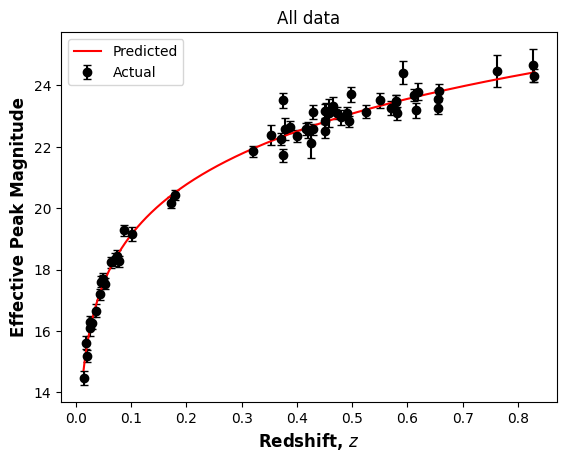

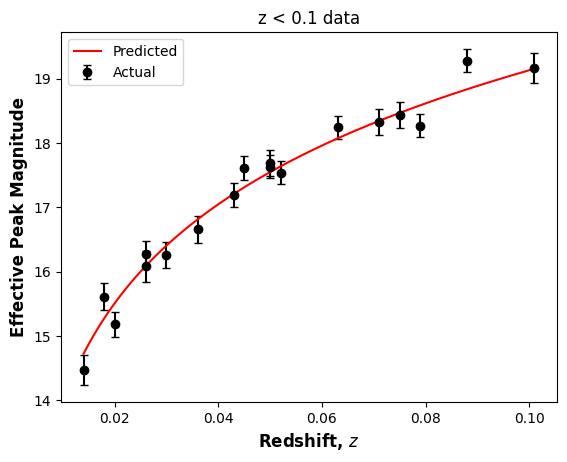

In [7]:
plt.figure(1)
plt.errorbar(redshift, eff_peak_mag, yerr = mag_err, label = 'Actual', color = 'black', capsize = 3, marker='o', linestyle='None')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), functions.mag_model(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, omega_lambda), label = 'Predicted', color = 'red')
plt.xlabel('Redshift, $z$', weight = 'bold', fontsize = 12)
plt.ylabel('Effective Peak Magnitude', weight = 'bold', fontsize = 12)
plt.legend()
plt.title('All data')

plt.figure(2)
plt.errorbar(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]+1], yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]+1], 
             label = 'Actual', color = 'black', capsize = 3, marker='o', linestyle='None')
plt.plot(np.linspace(np.min(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1]), np.max(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1]), 1000), 
        functions.mag_model(np.linspace(np.min(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1]), np.max(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1]), 1000), 
        L_peak, H_0, m_0, omega_lambda), label = 'Predicted', color = 'red')
plt.xlabel('Redshift, $z$', weight = 'bold', fontsize = 12)
plt.ylabel('Effective Peak Magnitude', weight = 'bold', fontsize = 12)
plt.legend()
plt.title('z < 0.1 data')

plt.show()